This notebook demonstrates basic operations of creating sample records (using the fake sample generator), adding them to a PQG graph, retrieving records from the graph, and visualizing the graph.

In [1]:
import logging
import duckdb
from isamples import *
from isamples import fake_samples

#logging.basicConfig(level=logging.DEBUG)
# Create an in-memory instance of PQG

ddb = duckdb.connect()
g = createGraph(ddb)

In [2]:
fake_samples.make_fakes(g, count=10)

In [3]:
import json
import pyperclip
data = g.getNode("msr_0")
print(json.dumps(data, indent=2, cls=pqg.JSONDateTimeEncoder))


{
  "pid": "msr_0",
  "label": "accept",
  "last_modified_time": "1971-07-13 02:54:54.610658",
  "description": "Reality stage success federal.\nOpportunity economy ever by. System maybe middle glass. Room among from safe fire class.",
  "sample_identifier": "msr_0",
  "alternate_identifiers": null,
  "sampling_purpose": "Left itself tough happy film stand mind.",
  "complies_with": null,
  "dc_rights": null,
  "produced_by": {
    "pid": "event_4",
    "label": "majority",
    "description": "Surface administration apply personal who treat travel. Congress explain class wrong hard hope media lot. Red so century democratic either together police young.",
    "has_feature_of_interest": "progress",
    "project": "project-almost",
    "result_time": "1986-01-26T11:13:40",
    "authorized_by": null,
    "responsibility": [
      {
        "pid": "agent_27",
        "name": "Peter Maynard",
        "affiliation": "New Jersey",
        "contact_information": "227 Matthew Lake\nMartinezhaven

In [4]:
for row in ddb.sql("SELECT s,p,o FROM node where otype='_edge_'").fetchall():
    print(row)


('event_4', 'responsibility', ['agent_27', 'agent_19'])
('site_5', 'site_location', ['geo_5'])
('event_4', 'sampling_site', ['site_5'])
('event_4', 'sample_location', ['geo_4'])
('msr_0', 'produced_by', ['event_4'])
('msr_0', 'has_context_category', ['https://fake.uri/context_category/middle', 'https://fake.uri/context_category/west'])
('msr_0', 'has_material_category', ['https://fake.uri/material_category/finish', 'https://fake.uri/material_category/need'])
('msr_0', 'has_sample_object_type', ['https://fake.uri/sample_object_type/real', 'https://fake.uri/sample_object_type/staff'])
('msr_0', 'keywords', ['https://fake.uri/keyword/well', 'https://fake.uri/keyword/wish', 'https://fake.uri/keyword/they'])
('cur_9', 'responsibility', ['agent_11', 'agent_18'])
('msr_0', 'curation', ['cur_9'])
('msr_0', 'registrant', ['agent_31'])
('event_2', 'responsibility', ['agent_27', 'agent_19'])
('event_2', 'sampling_site', ['site_5'])
('event_2', 'sample_location', ['geo_4'])
('msr_1', 'produced_by'

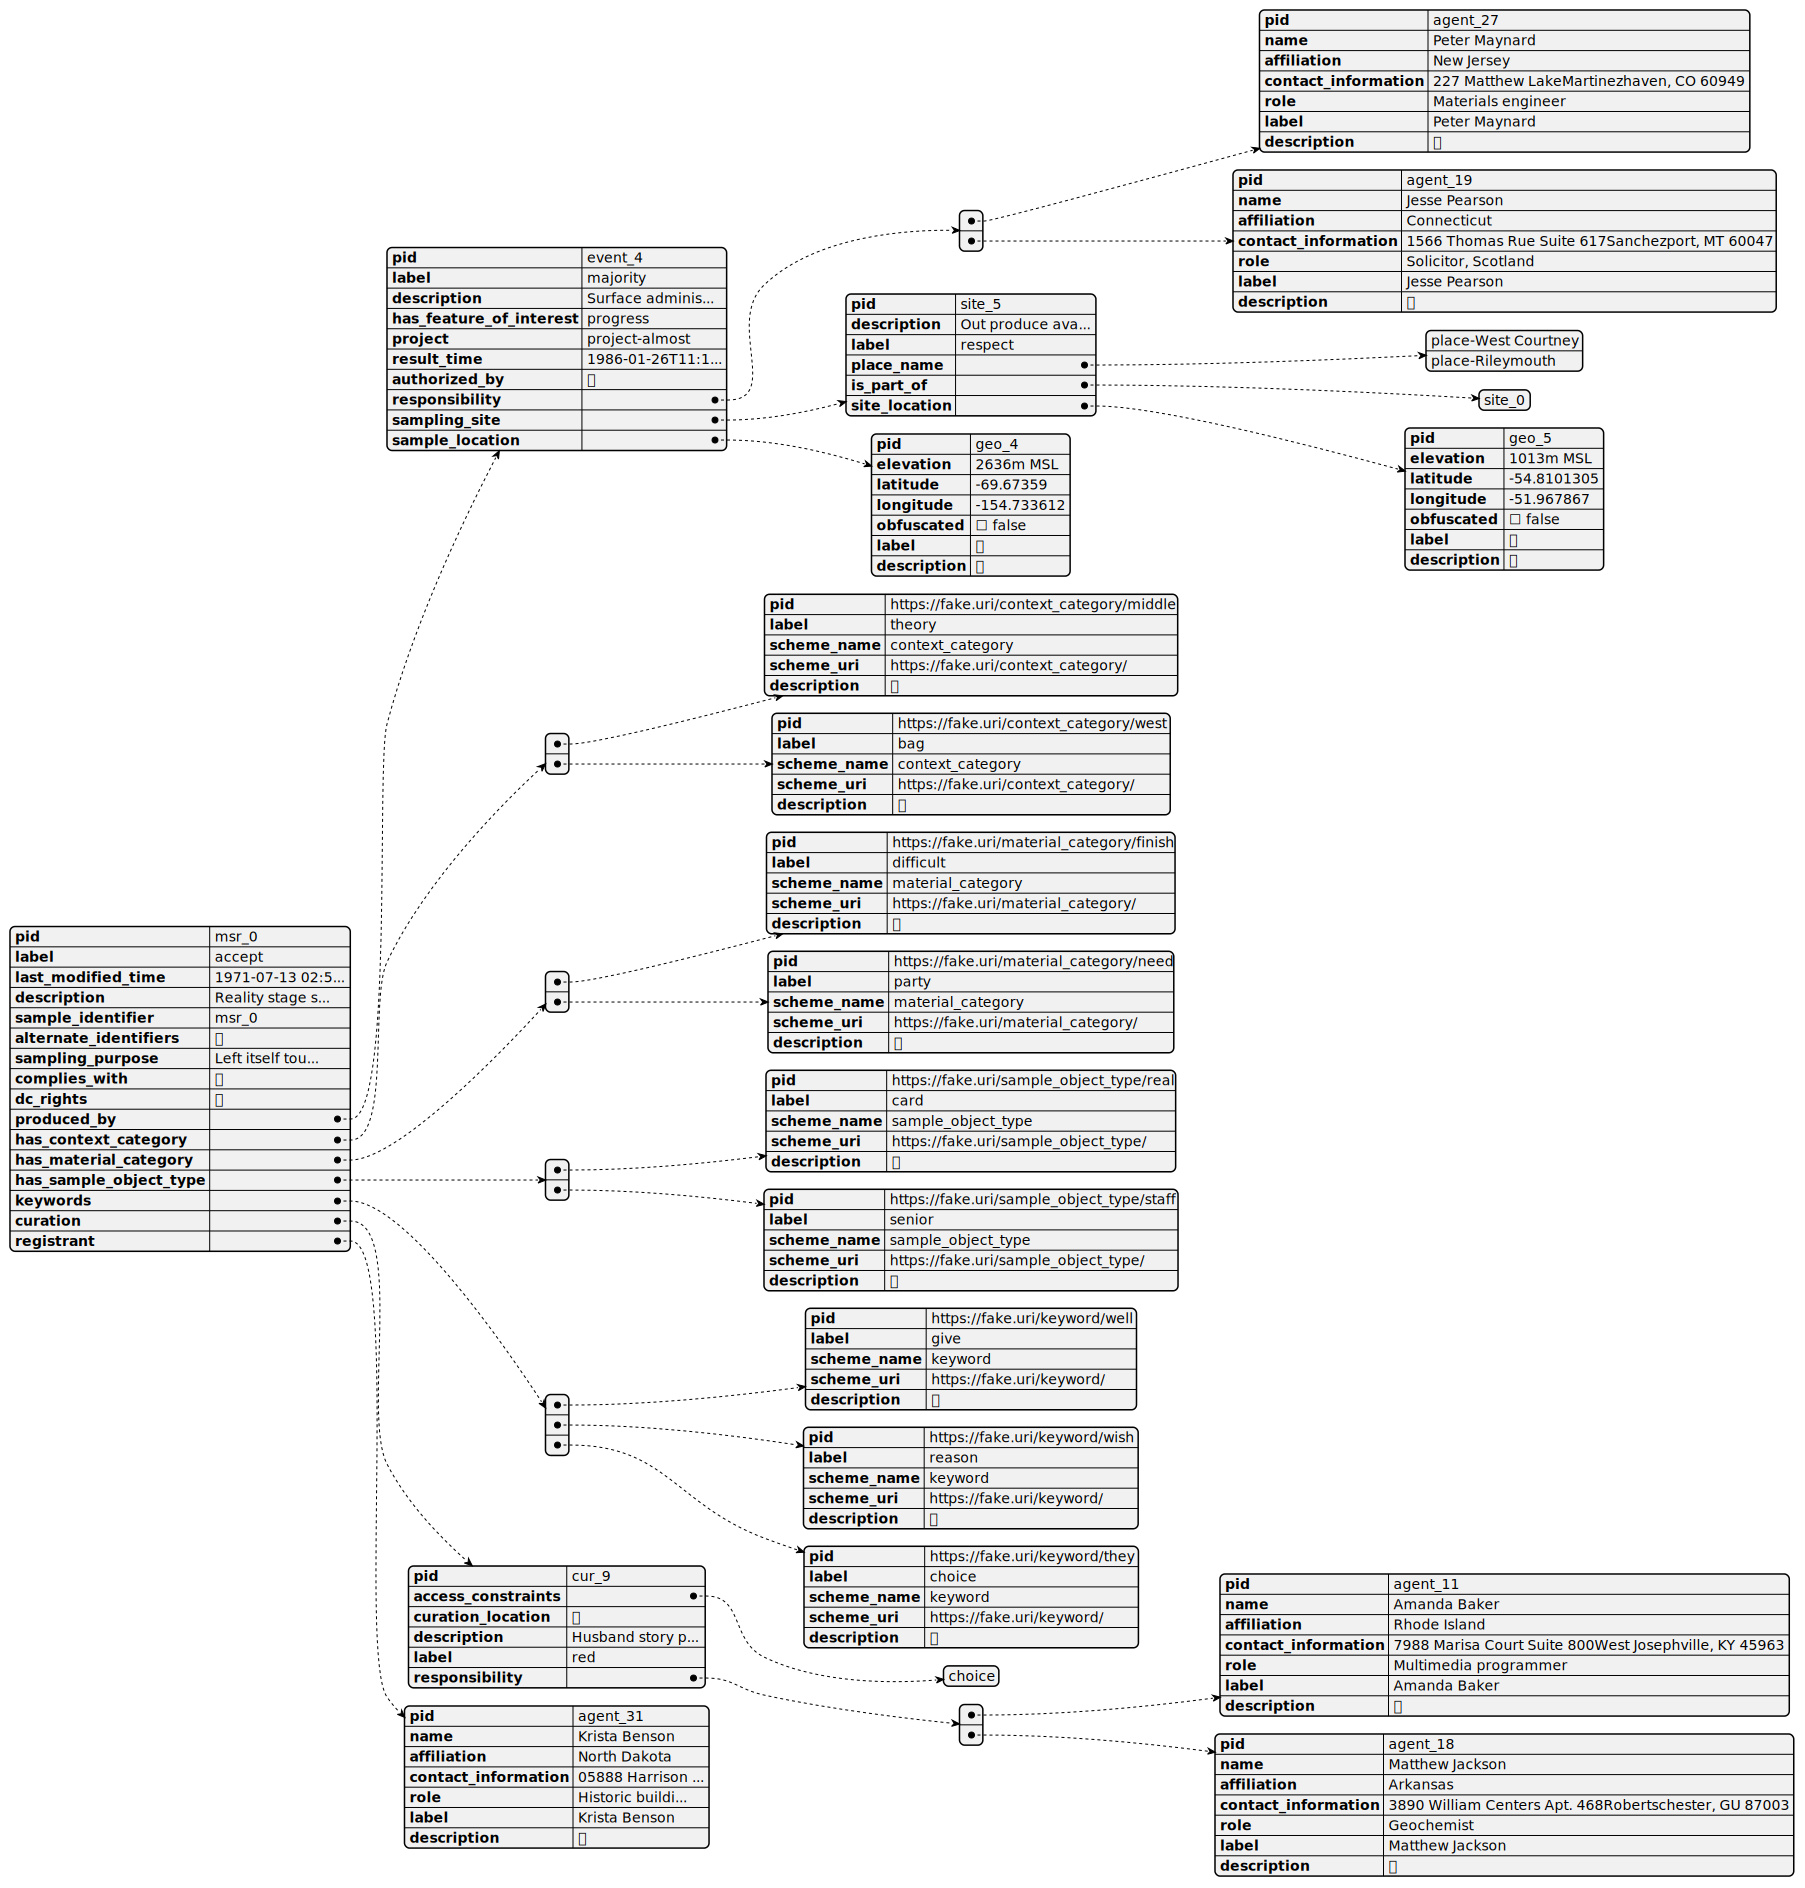

In [5]:
import IPython.display
import plantweb.render
import pqg.common

def shrink_text(o):
    new_o = {}
    for k,v in o.items():
        if isinstance(v, dict):
            new_o[k] = shrink_text(v)
        else:
            if isinstance(v, str):
                if len(v) > 15:
                    new_o[k] = v[:15] + "..."
                else:
                    new_o[k] = v
            else:
                new_o[k] = v
    return new_o


def displayPlantuml(content):
    _svg = plantweb.render.render(
                content,
                engine="plantuml",
                format="svg",
                cacheopts={"use_cache":False},
                server="http://localhost:2080/",
            )
    IPython.display.display(
        IPython.display.SVG(
            _svg[0]
        )
    )

pyperclip.copy(f"@startjson\n{json.dumps(shrink_text(data), indent=2, cls=pqg.JSONDateTimeEncoder)}\n@endjson")

displayPlantuml(f"@startjson\n{json.dumps(shrink_text(data), indent=2, cls=pqg.JSONDateTimeEncoder)}\n@endjson")

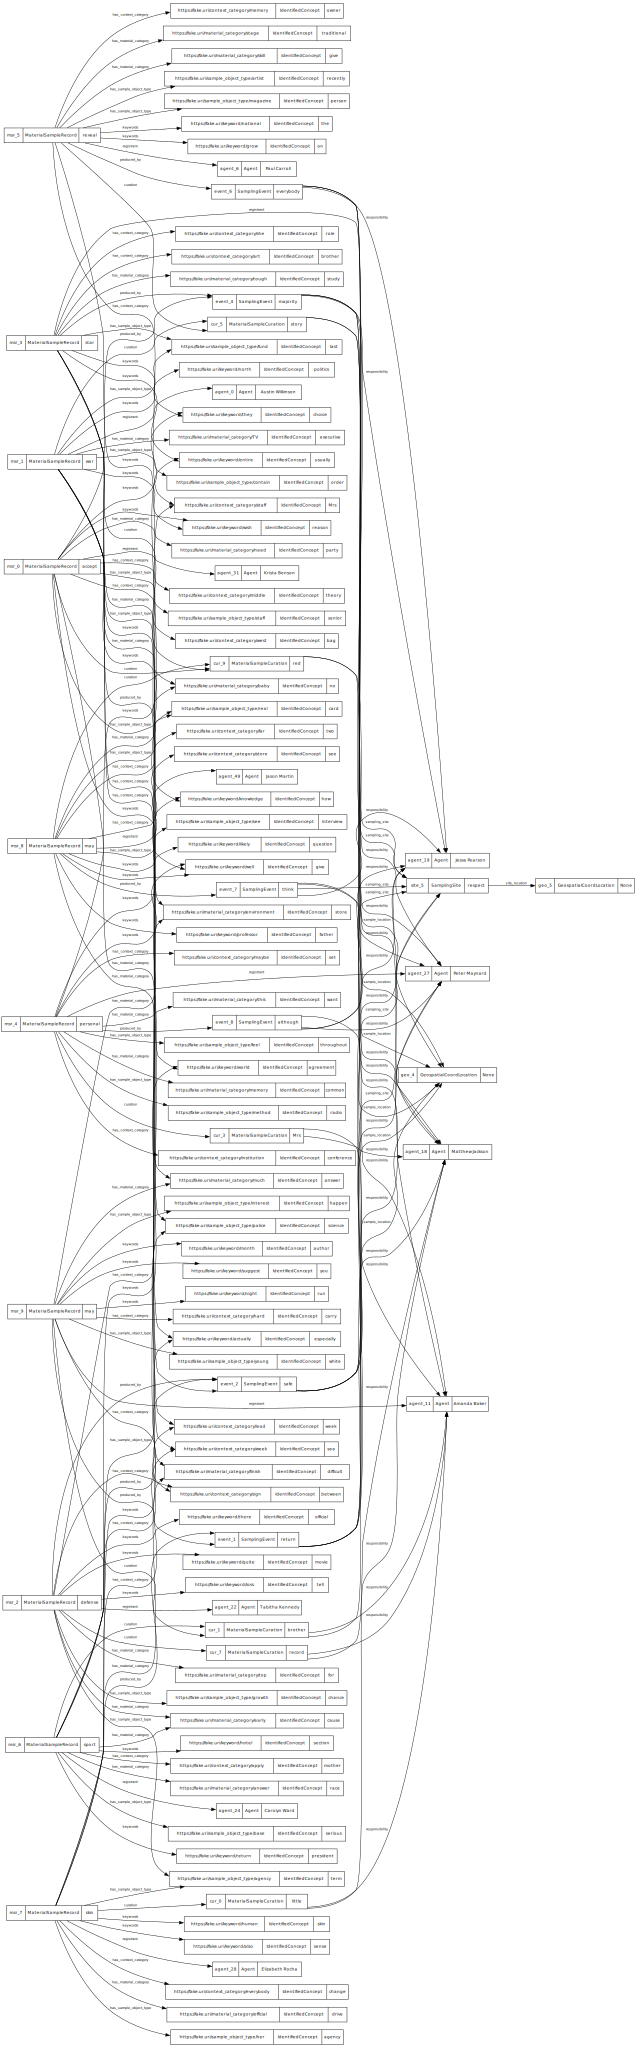

In [6]:
import IPython.display
import graphviz

dot = "\n".join(g.toGraphviz(rankdir="LR"))
pyperclip.copy(dot)
gv = graphviz.Source(dot)
IPython.display.display(gv)

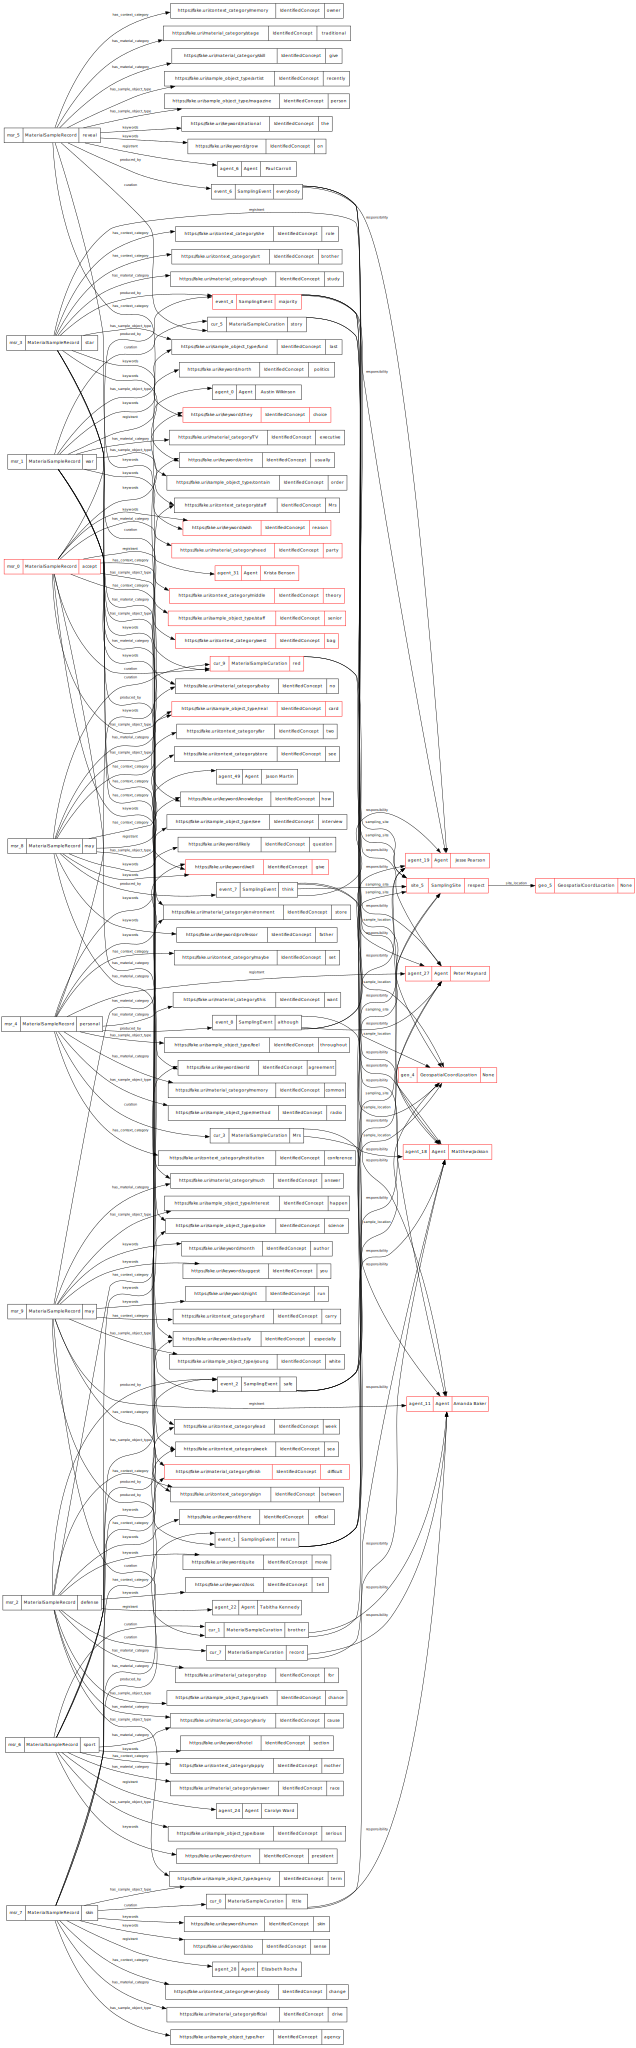

In [7]:
selected = g.getNodeIds("msr_0")
dot = "\n".join(g.toGraphviz(nlights=selected))
pyperclip.copy(dot)
gv = graphviz.Source(dot)
IPython.display.display(gv)